In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.utils.data as data
from torch.utils.data import DataLoader as DL
from torch.utils.data import TensorDataset as TD

$$FightingOverfitting

#### Introduction to deep learning with python

* Possible causes:

| _Problem_ | _Solutions_|
|----------|----------|
| Dataset is not large enough | Get more data / usedate augmentation |
| Model has too much capacity | reduce model size /add dropout |
| Weights are too much | Weight decay | 

### "Regularzation" using a dropout layer

In [50]:
model = nn.Sequential(
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Dropout(0.5)

)

features = torch.randn((1, 8))
model(features)

tensor([[2.9085, 0.0000, 1.6780, 0.0000]], grad_fn=<MulBackward0>)

In [51]:
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-4)

$$ Improvving Model Performance

### Steps to maximize performance 
* Overfit the training set
    * can we solve the problem?
    * Sets a performance baseline
* Reduce overfitting 
    * Improve performances on the validation set
* Fine-tune Hyperparameters 

In [52]:
trainloader =  torch.randn(4, 8)
print(trainloader)



tensor([[ 0.0415, -0.8350,  0.1940,  0.3345, -0.9531,  0.9239, -0.1457, -0.2902],
        [-2.7081, -0.5734,  0.2370,  0.5747, -0.1642,  0.9474, -0.7297,  0.2598],
        [-0.5605, -0.3473, -2.0134,  1.0373,  0.2219,  0.0646,  0.5243, -1.0113],
        [ 0.2954, -0.6153, -0.6476, -1.8253,  0.1188,  0.5444,  1.0263,  0.3312]])


In [53]:
# Assuming labels are available, create a TensorDataset
labels = torch.randint(0, 2, (4,))  # Example labels
dataset = TD(trainloader, labels)
trainloader = DL(dataset, batch_size=1)

features, labels = next(iter(trainloader))
print(features)
print(labels)

criterion = nn.CrossEntropyLoss()

tensor([[ 0.0415, -0.8350,  0.1940,  0.3345, -0.9531,  0.9239, -0.1457, -0.2902]])
tensor([0])


In [54]:
#Step1: Overfit the training set
for i in range(1000):
    outputs = model(features)
    
    loss =  criterion(outputs, labels)
    loss.backward()

    optimizer.step()

In [55]:
#Step2: reduce overfitting
# goal : maximize the validation accuracy
# + dropout
# + data augmentation
# + weight decay
# + reducing model capacity

In [56]:
model_o = nn.Sequential(
    nn.Linear(8,20),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(20,40),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(40,10),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(10,2)

)

In [ ]:
# Visualize the model Validation accuracy and training accuracy
# 1. Create a validation set
# 2. Create a validation dataloader
# 3. Compute the validation accuracy
# 4. Plot the validation accuracy
# 5. Save the model with the best validation accuracy

# Assuming labels are available, create a TensorDataset
val_features = torch.randn(100, 8)
val_labels = torch.randint(0, 2, (100,))  # Example labels
val_dataset = TD(val_features, val_labels)
val_loader = DL(val_dataset, batch_size=1)

val_features, val_labels = next(iter(val_loader))
print(val_features)
print(val_labels)

optimizer = optim.SGD(model_o.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

for i in range(1000):
    outputs = model_o(features)
    
    loss =  criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    outputs_val = model_o(val_features)
    loss_val = criterion(outputs_val, val_labels)
    loss_val.backward()

    optimizer.step()



tensor([[ 0.4592, -1.1995,  0.1083, -0.4314,  0.1103,  0.6175, -0.1186, -0.5109]])
tensor([1])


Accuracy of the network on the validation set: 46 %


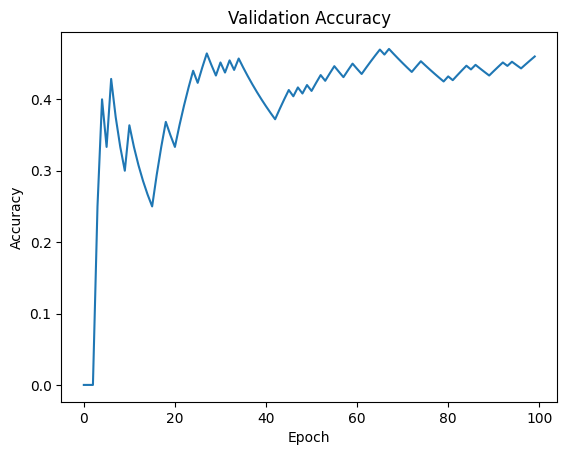

In [ ]:


# Create a validation set
val_features = torch.randn((100, 8))
val_labels = torch.randint(0, 2, (100,))
val_dataset = TD(val_features, val_labels)
val_loader = DL(val_dataset, batch_size=1)

# Compute the validation accuracy
correct = 0
total = 0

val_acc = []

with torch.no_grad():
    for features, labels in val_loader:
        outputs = model_o(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        val_acc.append(correct / total)

print('Accuracy of the network on the validation set: %d %%' % (100 * correct / total))


# Plot the validation accuracy

plt.plot(val_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()